### ML_Lab_Final_Project


In [116]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

from scipy.stats import uniform
from sklearn import linear_model, datasets
from sklearn.model_selection import RandomizedSearchCV

from sklearn.model_selection import GridSearchCV

from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier


from sklearn.model_selection import train_test_split


import warnings
warnings.filterwarnings('ignore')


In [117]:
df = pd.read_csv('insuranceFraud.csv')
pd.set_option('display.max_columns', None)
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,10/17/2014,OH,250/500,1000,1406.91,0,466132,MALE,MD,craft-repair,sleeping,husband,53300,0,1/25/2015,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,9935 4th Drive,5,1,YES,1,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y
1,228,42,342868,6/27/2006,IN,250/500,2000,1197.22,5000000,468176,MALE,MD,machine-op-inspct,reading,other-relative,0,0,1/21/2015,Vehicle Theft,?,Minor Damage,Police,VA,Riverwood,6608 MLK Hwy,8,1,?,0,0,?,5070,780,780,3510,Mercedes,E400,2007,Y
2,134,29,687698,9/6/2000,OH,100/300,2000,1413.14,5000000,430632,FEMALE,PhD,sales,board-games,own-child,35100,0,2/22/2015,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Columbus,7121 Francis Lane,7,3,NO,2,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N
3,256,41,227811,5/25/1990,IL,250/500,2000,1415.74,6000000,608117,FEMALE,PhD,armed-forces,board-games,unmarried,48900,-62400,1/10/2015,Single Vehicle Collision,Front Collision,Major Damage,Police,OH,Arlington,6956 Maple Drive,5,1,?,1,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
4,228,44,367455,6/6/2014,IL,500/1000,1000,1583.91,6000000,610706,MALE,Associate,sales,board-games,unmarried,66000,-46000,2/17/2015,Vehicle Theft,?,Minor Damage,None,NY,Arlington,3041 3rd Ave,20,1,NO,0,1,NO,6500,1300,650,4550,Accura,RSX,2009,N


In [118]:
df.shape

(1000, 39)

In [119]:
df

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,10/17/2014,OH,250/500,1000,1406.91,0,466132,MALE,MD,craft-repair,sleeping,husband,53300,0,1/25/2015,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,9935 4th Drive,5,1,YES,1,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y
1,228,42,342868,6/27/2006,IN,250/500,2000,1197.22,5000000,468176,MALE,MD,machine-op-inspct,reading,other-relative,0,0,1/21/2015,Vehicle Theft,?,Minor Damage,Police,VA,Riverwood,6608 MLK Hwy,8,1,?,0,0,?,5070,780,780,3510,Mercedes,E400,2007,Y
2,134,29,687698,9/6/2000,OH,100/300,2000,1413.14,5000000,430632,FEMALE,PhD,sales,board-games,own-child,35100,0,2/22/2015,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Columbus,7121 Francis Lane,7,3,NO,2,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N
3,256,41,227811,5/25/1990,IL,250/500,2000,1415.74,6000000,608117,FEMALE,PhD,armed-forces,board-games,unmarried,48900,-62400,1/10/2015,Single Vehicle Collision,Front Collision,Major Damage,Police,OH,Arlington,6956 Maple Drive,5,1,?,1,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
4,228,44,367455,6/6/2014,IL,500/1000,1000,1583.91,6000000,610706,MALE,Associate,sales,board-games,unmarried,66000,-46000,2/17/2015,Vehicle Theft,?,Minor Damage,None,NY,Arlington,3041 3rd Ave,20,1,NO,0,1,NO,6500,1300,650,4550,Accura,RSX,2009,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,7/16/1991,OH,500/1000,1000,1310.80,0,431289,FEMALE,Masters,craft-repair,paintball,unmarried,0,0,2/22/2015,Single Vehicle Collision,Front Collision,Minor Damage,Fire,NC,Northbrook,6045 Andromedia St,20,1,YES,0,1,?,87200,17440,8720,61040,Honda,Accord,2006,N
996,285,41,186934,1/5/2014,IL,100/300,1000,1436.79,0,608177,FEMALE,PhD,prof-specialty,sleeping,wife,70900,0,1/24/2015,Single Vehicle Collision,Rear Collision,Major Damage,Fire,SC,Northbend,3092 Texas Drive,23,1,YES,2,3,?,108480,18080,18080,72320,Volkswagen,Passat,2015,N
997,130,34,918516,2/17/2003,OH,250/500,500,1383.49,3000000,442797,FEMALE,Masters,armed-forces,bungie-jumping,other-relative,35100,0,1/23/2015,Multi-vehicle Collision,Side Collision,Minor Damage,Police,NC,Arlington,7629 5th St,4,3,?,2,3,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N
998,458,62,533940,11/18/2011,IL,500/1000,2000,1356.92,5000000,441714,MALE,Associate,handlers-cleaners,base-jumping,wife,0,0,2/26/2015,Single Vehicle Collision,Rear Collision,Major Damage,Other,NY,Arlington,6128 Elm Lane,2,1,?,0,1,YES,46980,5220,5220,36540,Audi,A5,1998,N


<AxesSubplot:>

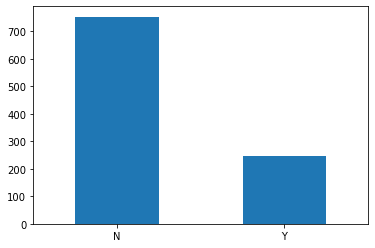

In [120]:
# plotting the target variables

df['fraud_reported'].value_counts().plot(kind = 'bar', rot = 1)

In [88]:
# we can see that the data set is imbalanced with huge humber of non fraud related case and very small number of cases that
# are marked fraud. So it is important to reduce the false positives. We want to make sure the analysis is rigorous and 
# not occuring by chance. 

In [89]:
yes_fraud = df[df['fraud_reported'] == 'Y']
no_fraud = df[df['fraud_reported'] == 'N']

<AxesSubplot:title={'center':"Fraudlent Claimant's Education"}>

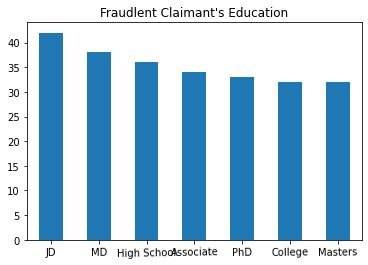

In [90]:
# plotting the claims count based on the education of the claimant whose claim was fraud
# this relationsship will show us, whether there is relation between the education level of 
# the claimant and whether the claim they file is likely fradulent

yes_fraud['insured_education_level'].value_counts().plot(kind = 'bar', x = 'Education', y = 'Count', rot = 1, title = "Fraudlent Claimant's Education")



<AxesSubplot:title={'center':"Non- Fradulent Claimant's Education"}>

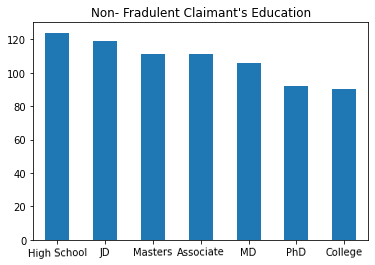

In [92]:
# plotting the non fradulent claims and the education level for those claimants

no_fraud['insured_education_level'].value_counts().plot(kind = 'bar', x = 'Education', \
                                                        y = 'Count', title = "Non- Fradulent Claimant's Education", \
                                                       rot = 1)

### Preprocessing

In [97]:
# getting feature data and label data in separate data frame

In [121]:
X_df = df.loc[:,'months_as_customer':'auto_year']
Y_df = df['fraud_reported']
Y_df = Y_df.replace("Y", 1)
Y_df = Y_df.replace("N", 0)

In [122]:
df.shape

(1000, 39)

In [123]:
df_converted = pd.get_dummies(X_df)

In [124]:
df_converted.shape

(1000, 2174)

In [125]:
# we’ll run a LogisticRegression model through grid search and random search cross validation first

In [127]:
def search_randomly(features, target, model, hyperparams, kFolds):
  randomizedsearch = RandomizedSearchCV(model, hyperparams, cv = kFolds, verbose=1)
  best_model = randomizedsearch.fit(features, target)
  print("The mean accuracy of the model is:",best_model.score(features, target))
  print("The best parameters for the model are:",best_model.best_params_)


logistic = linear_model.LogisticRegression(class_weight = 'balanced')

penalty = ['l1', 'l2']

C = np.random.uniform(0, 10, 10000)

hyper_param = dict(C=C, penalty=penalty)

search_randomly(df_converted, Y_df, logistic, hyper_param, 10)

Fitting 10 folds for each of 10 candidates, totalling 100 fits
The mean accuracy of the model is: 0.56
The best parameters for the model are: {'penalty': 'l2', 'C': 4.012334745504395}


In [128]:

def grid_search(features, target, model, hyperparams, kFolds):
  gridsearch = GridSearchCV(model, hyperparams, cv=kFolds, verbose=1)
  best_model = gridsearch.fit(features, target)
  print("The mean accuracy of the model is:",best_model.score(features, target))
  print("The best parameters for the model are:",best_model.best_params_)

    
penalty = ['l1', 'l2']

C = np.logspace(0, 10, 20)

hyper_param = dict(C=C, penalty=penalty)

grid_search(df_converted, Y_df, logistic, hyper_param, 10)

Fitting 10 folds for each of 40 candidates, totalling 400 fits
The mean accuracy of the model is: 0.56
The best parameters for the model are: {'C': 183298.07108324338, 'penalty': 'l2'}


In [106]:

# building pipeline now

In [108]:
## We will include our logistic regression models in addition to RandomForestClassifier and DecisionTreeClassifier
models = [
                {"classifier": [LogisticRegression()],
                 "classifier__penalty": ['l2','l1'],
                 "classifier__C": np.logspace(0, 4, 10)
                 },
                {"classifier": [LogisticRegression()],
                 "classifier__penalty": ['l2'],
                 "classifier__C": np.logspace(0, 4, 10),
                 "classifier__solver":['newton-cg','saga','sag','liblinear']
                 },
                {"classifier": [RandomForestClassifier()],
                 "classifier__n_estimators": [10, 100, 1000],
                 "classifier__max_depth":[5,8,15,25,30,None],
                 "classifier__min_samples_leaf":[1,2,5,10,15,100],
                 "classifier__max_leaf_nodes": [2, 5,10]},
                {"classifier": [DecisionTreeClassifier()],
                 "classifier__splitter":['best', 'random'],
                 "classifier__max_depth":[5,8,15,25,30,None],
                 "classifier__min_samples_leaf":[1,2,5,10,15,100],
                 "classifier__max_leaf_nodes": [2, 5,10]},
                 {"classifier": [DecisionTreeClassifier(class_weight = 'balanced')],
                 "classifier__splitter":['best', 'random'],
                 "classifier__max_depth":[5,8,15,25,30,None],
                 "classifier__min_samples_leaf":[1,2,5,10,15,100],
                 "classifier__max_leaf_nodes": [2, 5,10]},]

In [109]:
def execute_pipeline(features,target, model_list, kFolds):
  pipe = Pipeline([("classifier", RandomForestClassifier())])
  gridsearch = GridSearchCV(pipe, model_list, cv=kFolds, verbose=1, n_jobs=-1) # Fit grid search
  best_model = gridsearch.fit(features, target)
  print("The mean accuracy of the model is:",best_model.score(features, target))
  print("The best parameters for the model are:",best_model.best_params_)

In [110]:

# execute the pipeline 

In [129]:
execute_pipeline(df_converted, Y_df, models, 5)

Fitting 5 folds for each of 816 candidates, totalling 4080 fits
The mean accuracy of the model is: 0.87
The best parameters for the model are: {'classifier': DecisionTreeClassifier(class_weight='balanced', max_depth=5, max_leaf_nodes=10,
                       min_samples_leaf=15), 'classifier__max_depth': 5, 'classifier__max_leaf_nodes': 10, 'classifier__min_samples_leaf': 15, 'classifier__splitter': 'best'}


In [112]:
# I wanted to take one step further and ran logistic regression and decisiontree classifier 
# to investigate classification report on our train-test slpit data

In [113]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df_converted, Y_df, test_size=0.2, random_state=30)

log_Reg = linear_model.LogisticRegression(C=1.0, penalty='l2')
log_Reg.fit(X_train, y_train)
y_pred = log_Reg.predict(X_test)

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.77      0.99      0.87       154
           1       0.00      0.00      0.00        46

    accuracy                           0.77       200
   macro avg       0.38      0.50      0.43       200
weighted avg       0.59      0.77      0.67       200



In [114]:
# lets check the similar classsification report for decisiontree classifier

In [115]:
dec_Tree = DecisionTreeClassifier(class_weight='balanced', criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=5, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=10,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
             random_state=None, splitter='best')


dec_Tree.fit(X_train, y_train)

y_pred = dec_Tree.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.81      0.87       154
           1       0.57      0.85      0.68        46

    accuracy                           0.81       200
   macro avg       0.76      0.83      0.77       200
weighted avg       0.86      0.81      0.83       200

